<h3 style="background-color: #F7F7F7; color: blue; padding: 10px;">
    2d AttId Grid Plots
</h3>


In [19]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pickle
import os
from hom import compute_cube_labels, plot_hom, write_cube_labels

In [20]:
system = 2                  # [1,2,3,4,5,6,7,8,10,11]
num_of_pts = 100            # [10, 100, 1000, 10000]
num_points_per_dim = 101      # User Choice

In [21]:
path = f'../data2/system{system}/'
path_out = path + str(num_points_per_dim) + 'gppd/'

isExist = os.path.exists(path)
if not(isExist):
    print('The data for this system / number of points does not exist. Run make_data.py to create data.')
else:
    with open(path + 'exp_info.pickle', 'rb') as handle:
        exp_info = pickle.load(handle)
    domain = exp_info['domain']
    print(exp_info)
    print('Number of Boxes = ', (num_points_per_dim-1)**exp_info['dim'])

{'system': 2, 'num_of_pts': 100, 'domain': ((-2, 2), (-3.5, 3.5)), 'dim': 2, 'step_size': 1, 'eps': 0.001, 'max_iter': 100, 'norm': False, 'delay': False, 'delay_iter': 20, 'resolution': 5.9, 'n_components': 2}
Number of Boxes =  10000


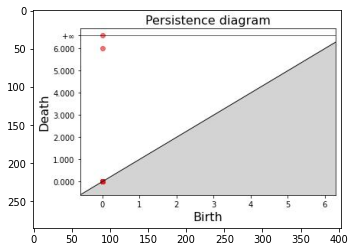

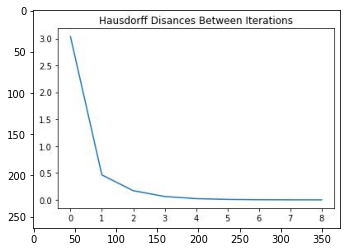

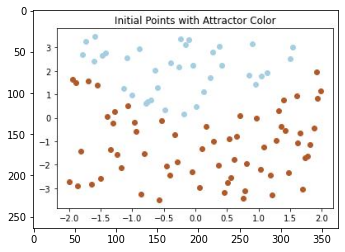

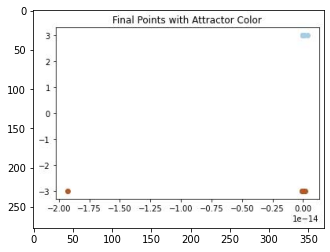

A resolution of 5.9 was used which yeilded 2 connected components in the graph


In [22]:
plt.figure()
PD_img = mpimg.imread(f'../output/figures/system{system}/' + f'PD.jpg')
imgplot = plt.imshow(PD_img)
plt.show()

plt.figure()
HD_img = mpimg.imread(f'../output/figures/system{system}/' + f'Hausdorff_Disances_Between_Iterations.jpg')
imgplot = plt.imshow(HD_img)
plt.show()

plt.figure()
IP_img = mpimg.imread(f'../output/figures/system{system}/' + f'Initial_Points_with_Attractor_Color.jpg')
imgplot = plt.imshow(IP_img)
plt.show()

plt.figure()
FP_img = mpimg.imread(f'../output/figures/system{system}/' + f'Final_Points_with_Attractor_Color.jpg')
imgplot = plt.imshow(FP_img)
plt.show()

print('A resolution of', exp_info['resolution'], 'was used which yeilded', exp_info['n_components'], 'connected components in the graph')

In [23]:
#%run plot_data.py {system} {num_of_pts}

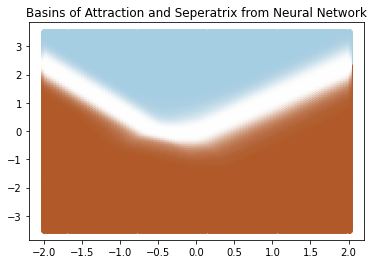

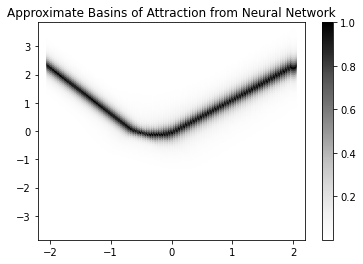

<Figure size 432x288 with 0 Axes>

In [24]:
%run analyze_data.py {system} {num_of_pts} {num_points_per_dim}

In [25]:
data_on_grid=np.loadtxt(path_out + 'data_on_grid.csv', delimiter=',')
df=pd.read_csv(path_out + 'data_on_grid.csv', delimiter=',', header=None)  
#df.describe()     

In [26]:
dim = exp_info['dim']
N = int(num_points_per_dim) 
X = [np.linspace(domain[i][0],domain[i][1],N) for i in range(dim)]

In [27]:
cube_labels = compute_cube_labels(data_on_grid, N, dim)

[3517, 6313, 0, 170]


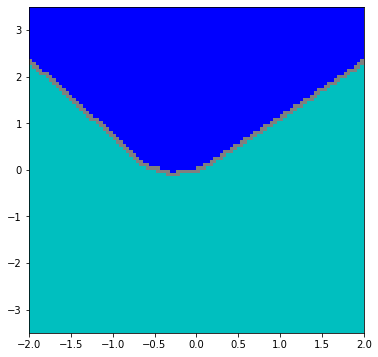

In [28]:
plot_hom(cube_labels, domain, N, X)

In [29]:
write_cube_labels(cube_labels, dim, N, path_out)

In [30]:
!./homcubes {path_out}/att0.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from '../data2/system2/101gppd//att0.txt'... 3517 cubes read.
300 bit fields allocated (0 MB) to speed up 2-dimensional reduction.
Reducing full-dim cubes from X... .               3       7      11      14      18      22      26      29      335*         3516 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... .. 8 removed, 1 left.
Note: The dimension of X decreased from 2 to 0.
Creating the chain complex of X... Done.
Vertices used: 3517 of dim 2.
Time used so far: 0.02 sec (0.000 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.02 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [31]:
!./homcubes {path_out}/att1.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from '../data2/system2/101gppd//att1.txt'... 6313 cubes read.
300 bit fields allocated (0 MB) to speed up 2-dimensional reduction.
Reducing full-dim cubes from X... .               3       7      11      14      18      22      26      29      33      37      41      44      48      52      55      596*         6312 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... .. 8 removed, 1 left.
Note: The dimension of X decreased from 2 to 0.
Creating the chain complex of X... Done.
Vertices used: 6313 of dim 2.
Time used so far: 0.04 sec (0.001 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.04 sec (0.001 min).
Thank you for using this software. We appreciate your business.


In [32]:
!./homcubes {path_out}/att2.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Note: The empty file '../data2/system2/101gppd//att2.txt' is assumed to contain cubes.
Reading cubes to X from '../data2/system2/101gppd//att2.txt'... 0 cubes read.
The set X is empty. The homology of X is trivial.
Thank you for using this software. We appreciate your business.


In [33]:
!./homcubes {path_out}/att3.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
ERROR: Cannot open the file '../data2/system2/101gppd//att3.txt'.
Call with '--help' for help.


In [34]:
!./homcubes {path_out}/sep.txt

HOMCUBES, ver. 3.07, 07/21/10. Copyright (C) 1997-2010 by Pawel Pilarczyk.
This is free software. No warranty. Consult 'license.txt' for details.
Reading cubes to X from '../data2/system2/101gppd//sep.txt'... 170 cubes read.
300 bit fields allocated (0 MB) to speed up 2-dimensional reduction.
Reducing full-dim cubes from X... .         *         169 removed, 1 left.
Transforming X into cells... 1 cells added.
Collapsing faces in X... .. 8 removed, 1 left.
Note: The dimension of X decreased from 2 to 0.
Creating the chain complex of X... Done.
Vertices used: 173 of dim 2.
Time used so far: 0.00 sec (0.000 min).
Computing the homology of X over the ring of integers...
H_0 = Z
Total time used: 0.00 sec (0.000 min).
Thank you for using this software. We appreciate your business.


In [35]:
import pychomp2 as pychomp
import os
filenames = []
for file in os.listdir(path_out):
    if file.startswith("att") or file.startswith("sep"):
        filenames.append(os.path.join(path_out, file))

homology = []
for fname in filenames:
    with open(fname) as f:
        lines = f.readlines()
        cubes = [eval(elem) for elem in lines]
        if len(cubes) != 0:
            hom = pychomp.CubicalHomology(cubes)
        else:
            hom = None
        homology.append(hom)
homology = [i for i in homology if i is not None]

In [36]:
print(homology)
with open(path_out + 'homology.txt','w') as hom:
    hom.write(str(homology))

[[1, 0, 0], [1, 0, 0], [1, 0, 0]]
